In [1]:
import sys
sys.path.append('../')

In [2]:
from fourier_analysis.pennylane_fourier import *
from fourier_analysis.pennylane_fourier import *
import pennylane as qml
import numpy as np
import os
import pickle

In [3]:
# Load the Data

path = "../../results/continuous/skolik_arch/schuld_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper"
pickle_files = [f for f in os.listdir(path) if f.endswith(".pkl")]
agents = []

In [4]:
for pickle_file in pickle_files:
    with open(os.path.join(path, pickle_file), 'rb') as f:
        agents.append(pickle.load(f))

In [5]:
weights = agents[0]["weights"]

In [6]:
num_layers = 5
num_qubits = 4
circuit_arch = "skolik"
data_reuploading = "schuld"
measurement = "ZZ"

In [8]:
parameters = weights[0]
parameters = np.reshape(parameters, (num_layers+1, num_qubits*2))
data = np.random.uniform(-0.05,0.05)

In [10]:
fourier = Fourier_Analysis(num_qubits, num_layers, circuit_arch, data_reuploading, measurement, parameters, data)

In [11]:
freqs = fourier.circuit_spectrum()

In [12]:
freqs

{'x_0': [-5.0, -4.0, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4.0, 5.0],
 'x_1': [-5.0, -4.0, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4.0, 5.0],
 'x_2': [-5.0, -4.0, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4.0, 5.0],
 'x_3': [-5.0, -4.0, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4.0, 5.0]}

We have five layers, so it makes sense that the circuit has a degree of five.

In [13]:
coeffs = fourier.fourier_coefficients()

In [14]:
coeffs

array([-0.11699441+0.j        , -0.00581249-0.00072109j,
        0.19357604-0.05552114j,  0.01301899-0.02781458j,
        0.04225475+0.02375699j,  0.01466952+0.00581159j,
        0.01466952-0.00581159j,  0.04225475-0.02375699j,
        0.01301899+0.02781458j,  0.19357604+0.05552114j,
       -0.00581249+0.00072109j])

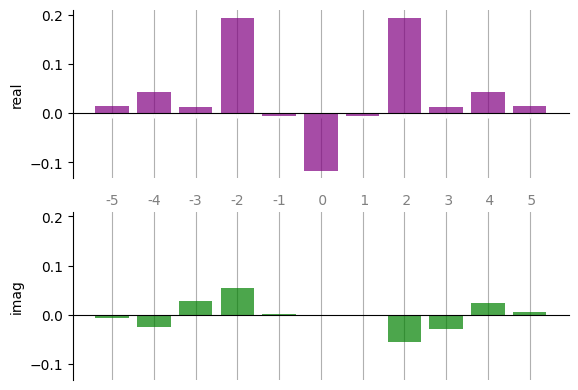

In [15]:
fourier.plot_coefficients()

So these are the coefficients of an agent that was able to solve the environment. What if we check the coefficients of a circuit with random parameters?

In [25]:
weights = np.random.uniform(0, 2*np.pi, size=(num_layers+1, num_qubits*2))

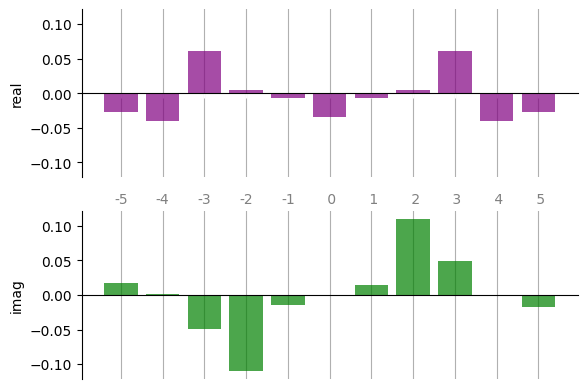

In [26]:
fourier.plot_coefficients(weights = weights)

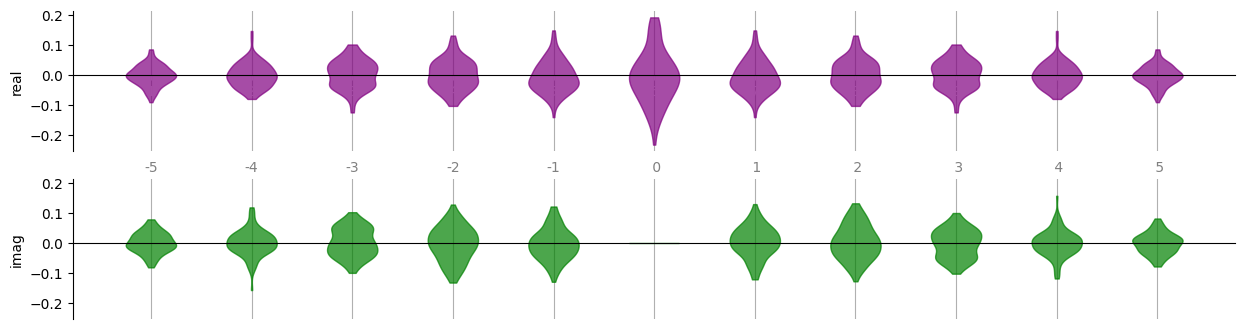

In [35]:
fourier.plot_random_coefficients_distribution()

Let's try and Analyze the difference between the final schuld datareup circuits, the final basic datareup circuits, and the baseline circuits.

In [3]:
# Let's start by loading the data needed
schuld_datareup_agents = []
basic_datareup_agents = []
baseline_agents = []

agents = [schuld_datareup_agents, basic_datareup_agents, baseline_agents]

path_schuld = "../../results/continuous/skolik_arch/schuld_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper/"
path_basic = "../../results/continuous/skolik_arch/basic_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper/"
path_baseline = "../../results/continuous/skolik_arch/baseline/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper/"

paths = [path_schuld, path_basic, path_baseline]

for i,path in enumerate(paths):
    pickle_files = [f for f in os.listdir(path) if f.endswith(".pkl")]
    for pickle_file in pickle_files:
        with open(os.path.join(path, pickle_file), 'rb') as f:
            agents[i].append(pickle.load(f))



In [4]:
# Let's pick a schuld_datareup agent that solved the environment
# To solve the environment, the last 10 episodes must have an average reward of 195 or higher

for i,agent in enumerate(schuld_datareup_agents):
    if np.mean(agent["episode_reward_history"][-10:]) >= 195:
        print("Agent {} solved the environment".format(i))
        break

# Let's pick a basic_datareup agent that solved the environment
# To solve the environment, the last 10 episodes must have an average reward of 195 or higher

for i,agent in enumerate(basic_datareup_agents):
    if np.mean(agent["episode_reward_history"][-10:]) >= 195:
        print("Agent {} solved the environment".format(i))
        break
    print("Agent {} did not solve the environment".format(i))


# Let's pick a baseline agent that solved the environment
# To solve the environment, the last 10 episodes must have an average reward of 195 or higher

for i,agent in enumerate(baseline_agents):
    if np.mean(agent["episode_reward_history"][-10:]) >= 195:
        print("Agent {} solved the environment".format(i))
        break
    print("Agent {} did not solve the environment".format(i))

Agent 0 solved the environment
Agent 0 solved the environment
Agent 0 solved the environment


It seems like agent 0 of all three types of circuits have solved the environment. Let's plot the moving average of the reward of the first agent of each type of circuit.

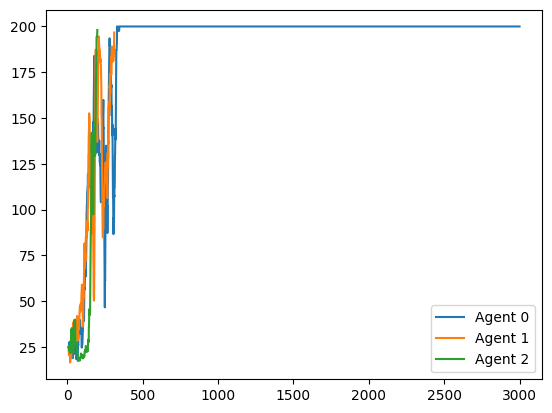

In [5]:
# Let's plot the moving average of 10 episodes of the reward history of the agent that solved the environment

import matplotlib.pyplot as plt
import pandas as pd


for i in range(len(agents)):
     plt.plot(pd.Series(agents[i][0]["episode_reward_history"]).rolling(10).mean(), label=f"Agent {i}")

plt.legend()
plt.show()



In [11]:
# Let's store the final weights of the agents that solved the environment

schuld_datareup_weights = schuld_datareup_agents[0]["weights"]
basic_datareup_weights = basic_datareup_agents[0]["weights"]
baseline_weights = baseline_agents[0]["weights"]

In [12]:
#We only care about the rotational parameters

num_layers = 5
num_qubits = 4
circuit_arch = "skolik"
mesasurement = "ZZ"

schuld_datareup_parameters = np.reshape(schuld_datareup_weights[0], (num_layers+1, num_qubits*2))
basic_datareup_parameters = np.reshape(basic_datareup_weights[0], (num_layers, num_qubits*2))
baseline_parameters = np.reshape(baseline_weights[0], (num_layers, num_qubits*2))
data = np.random.uniform(-0.05,0.05)

In [ ]:
fourier_analysis_schuld = Fourier_Analysis(num_qubits, num_layers, circuit_arch, "schuld", measurement, parameters, data)